# Analysis of PnL

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis

# from ProjectLibrary.pnl_utilities import hitrate, relativepnl, realized_volatility

In [10]:
forecast_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_strategies\corn_arma_ma\output\arma(2,2)\forecasts_corn_(2, 2)_True_5.csv',parse_dates=True,index_col='asofdate')
pnl_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_strategies\corn_arma_ma\output\arma(2,2)\pnl_corn_arma_ma50_(2,2).csv',parse_dates=True,index_col='asofdate')

# Positions


In [11]:
# Retrieve dataframe of positions
merge_df = pnl_df.merge(forecast_df, left_on='asofdate', right_on='asofdate')
positions = merge_df[(merge_df['forecastday'] == 5)][['pnl','pointForecast','forecastday','product_name']]


positions[positions['pnl']!=0]
volatility = (np.log(positions['pnl'].cumsum()/positions['pnl'].cumsum().shift(1))).dropna(axis=0).rolling(window=30).std(ddof=0)*np.sqrt(252)


c:\Users\James Stanley\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


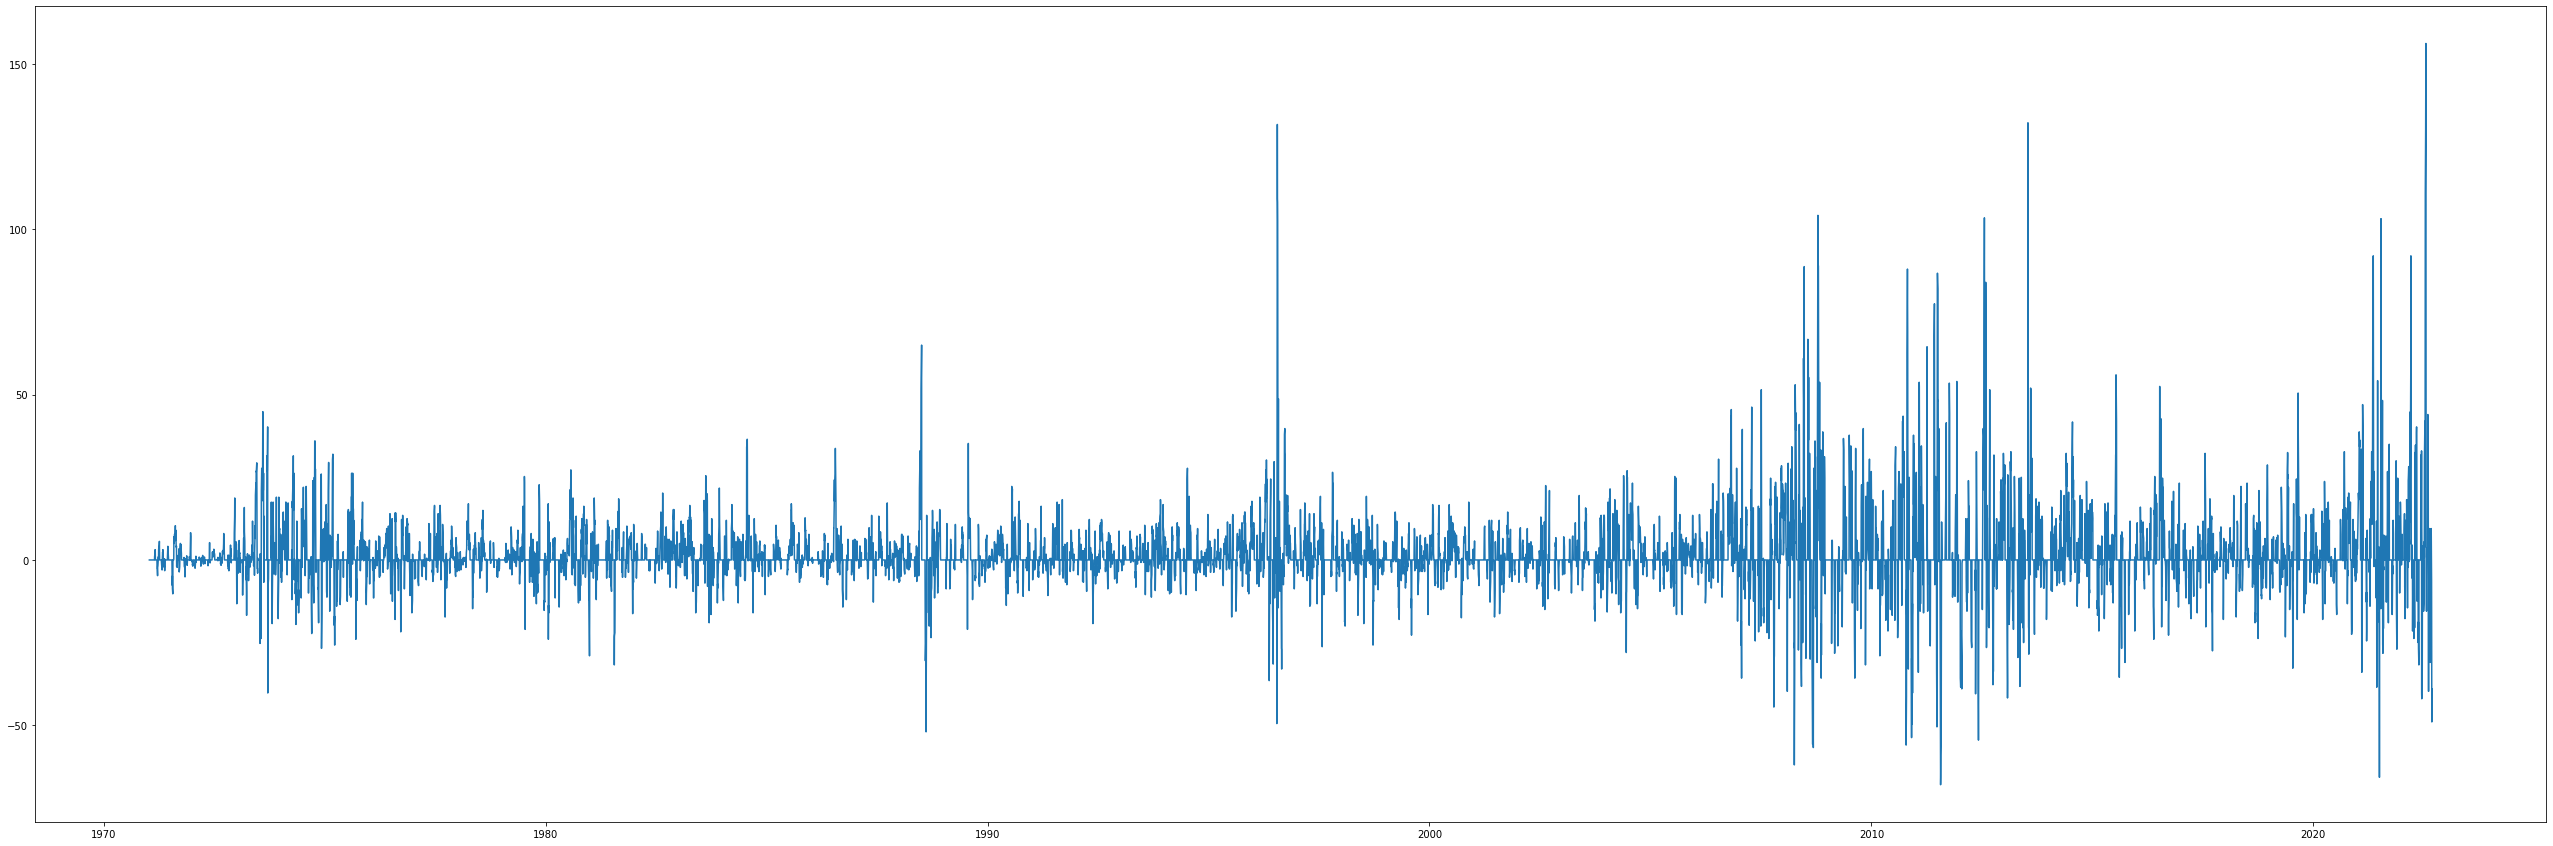

In [13]:
plt.figure(figsize=(45,15))

plt.plot(pnl_df['pnl'])

plt.show()

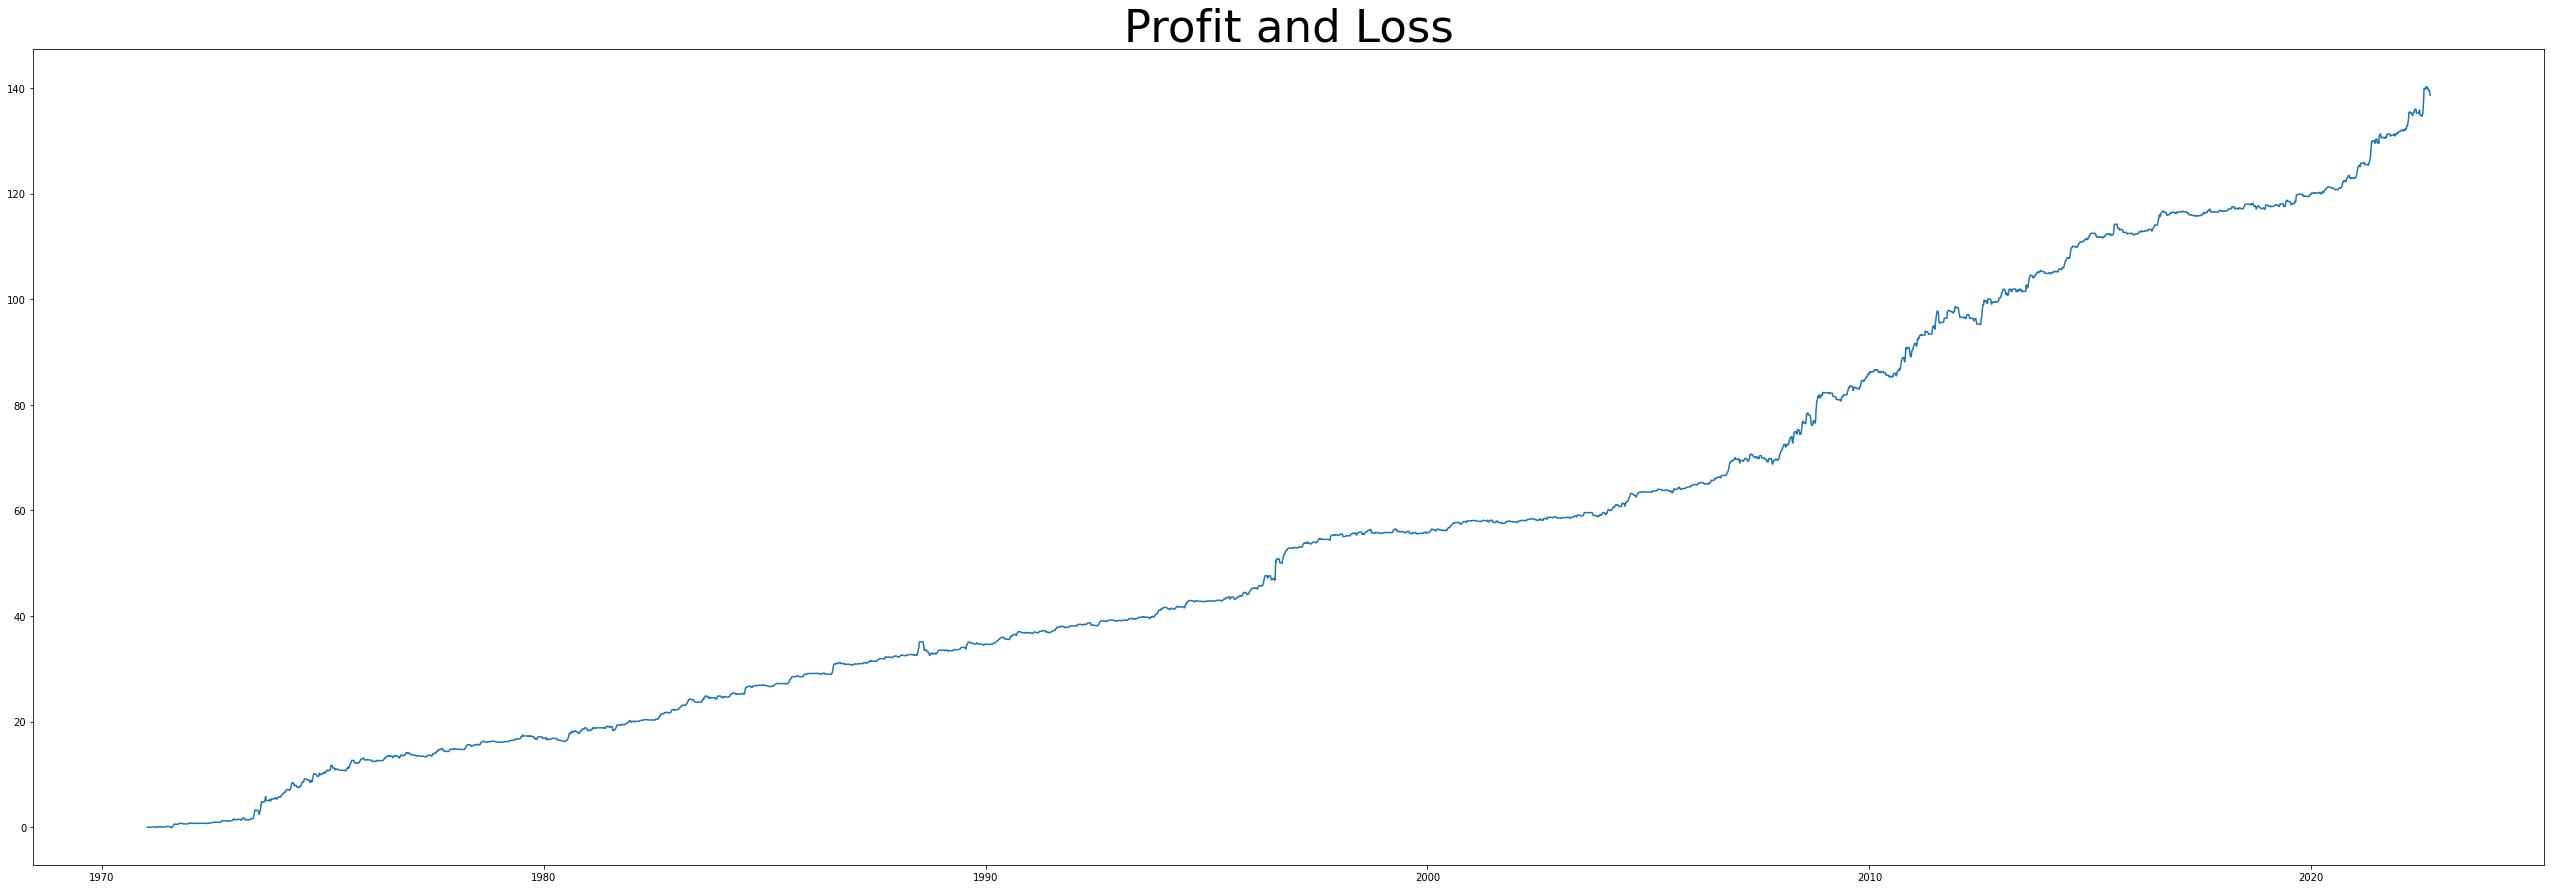

In [14]:
# Cumulative PnL
cumulative_pnl=pnl_df['pnl'].cumsum()/forecast_df['close'][0]

plt.figure(figsize=(45,15))

plt.title('Profit and Loss',fontsize=45)
plt.plot(cumulative_pnl)
plt.show()

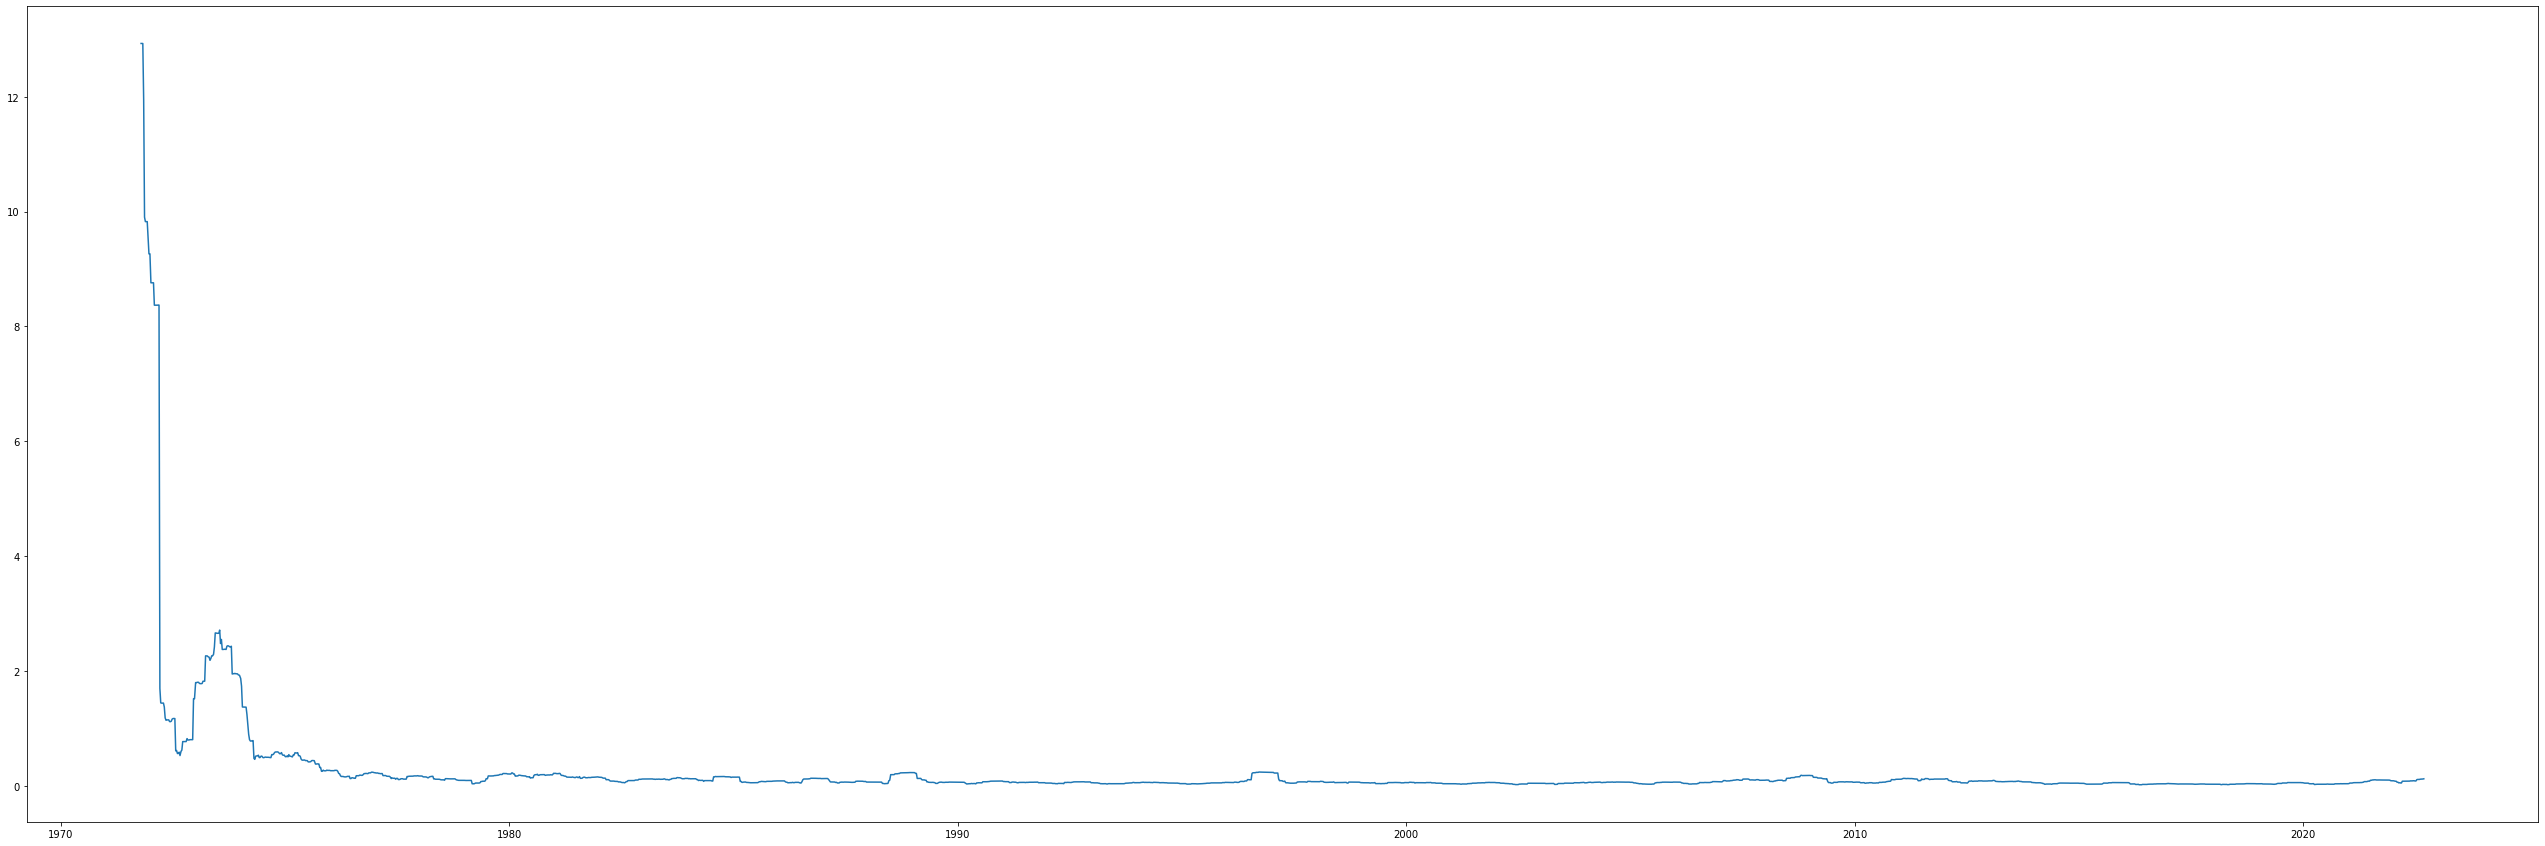

In [15]:
plt.figure(figsize=(45,15))
plt.plot(volatility)
plt.show()

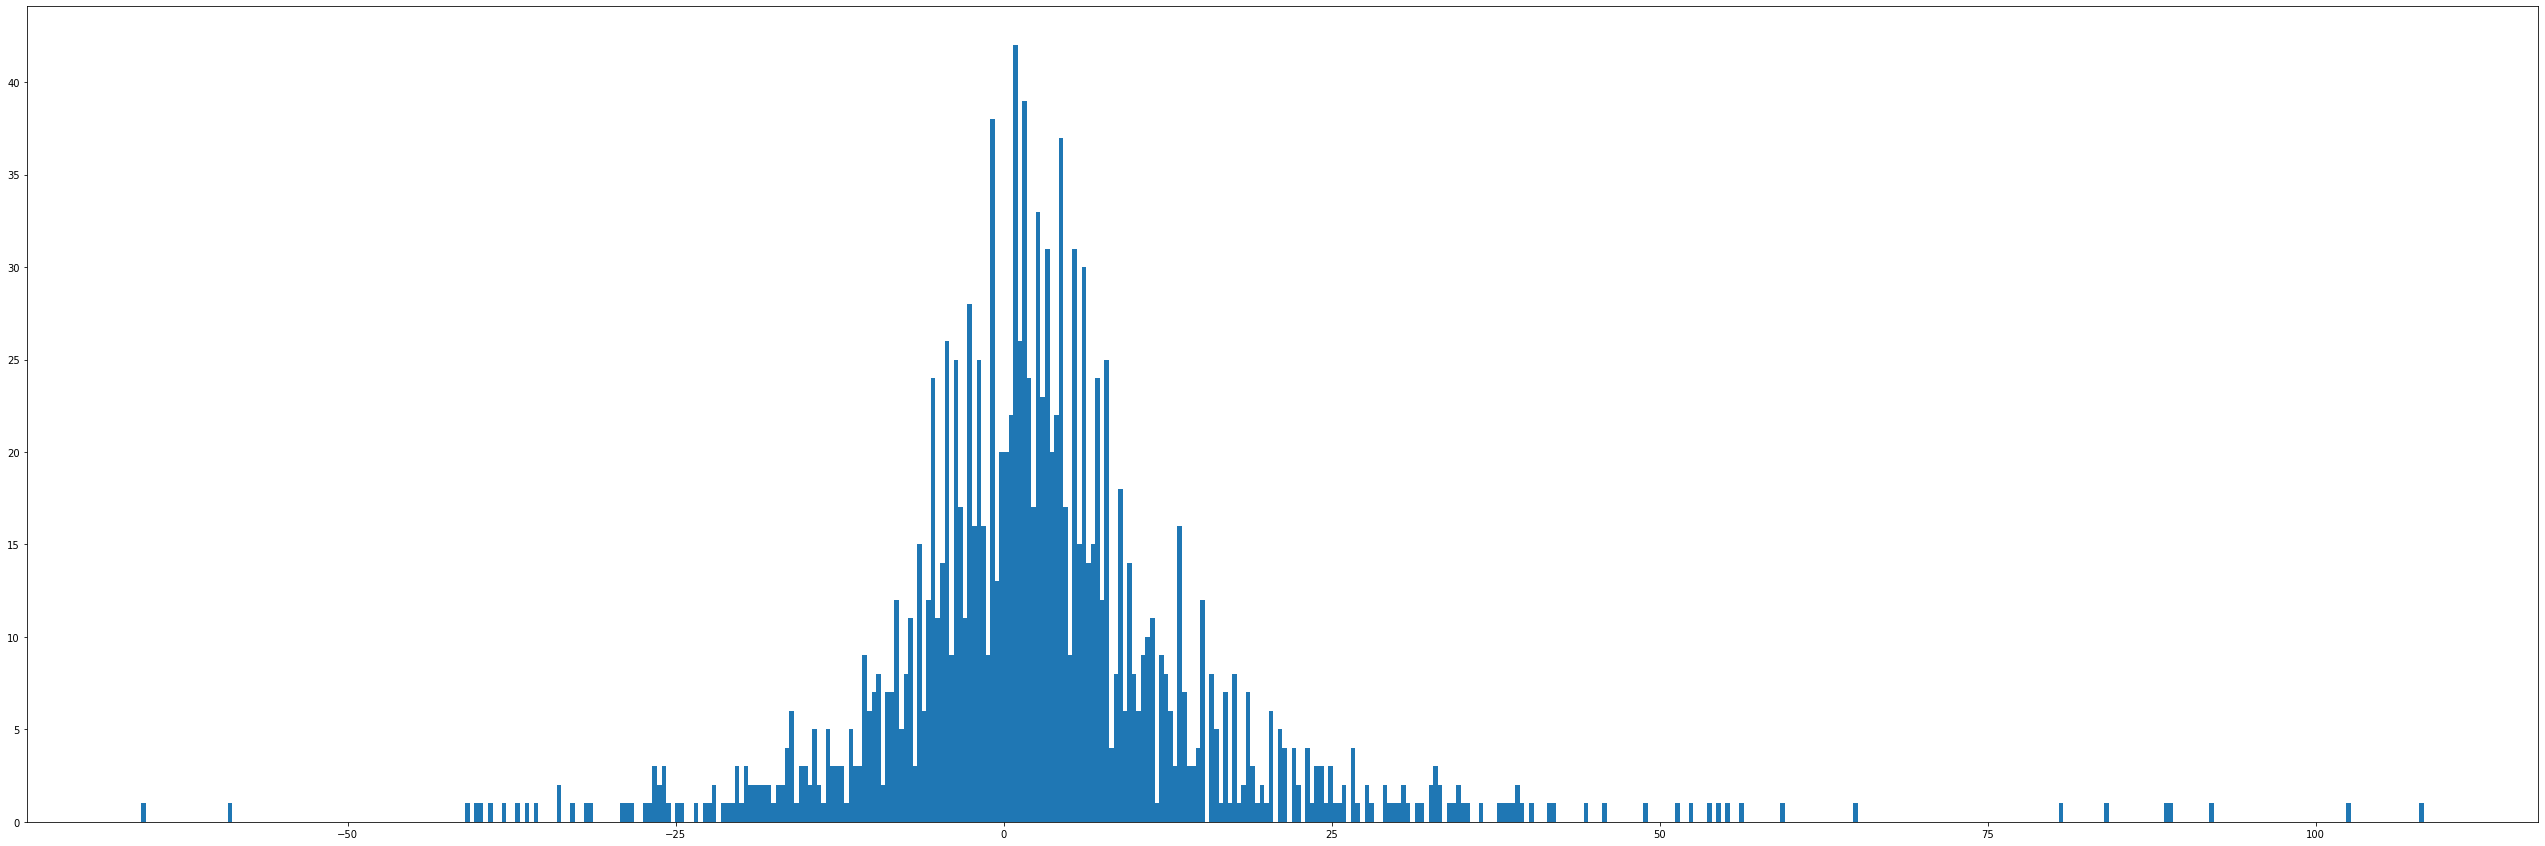

In [16]:
plt.figure(figsize=(45,15))

plt.hist(positions['pnl'][positions['pnl'] != 0],bins=500)

plt.show()

# Compare MA, predictions & actual price

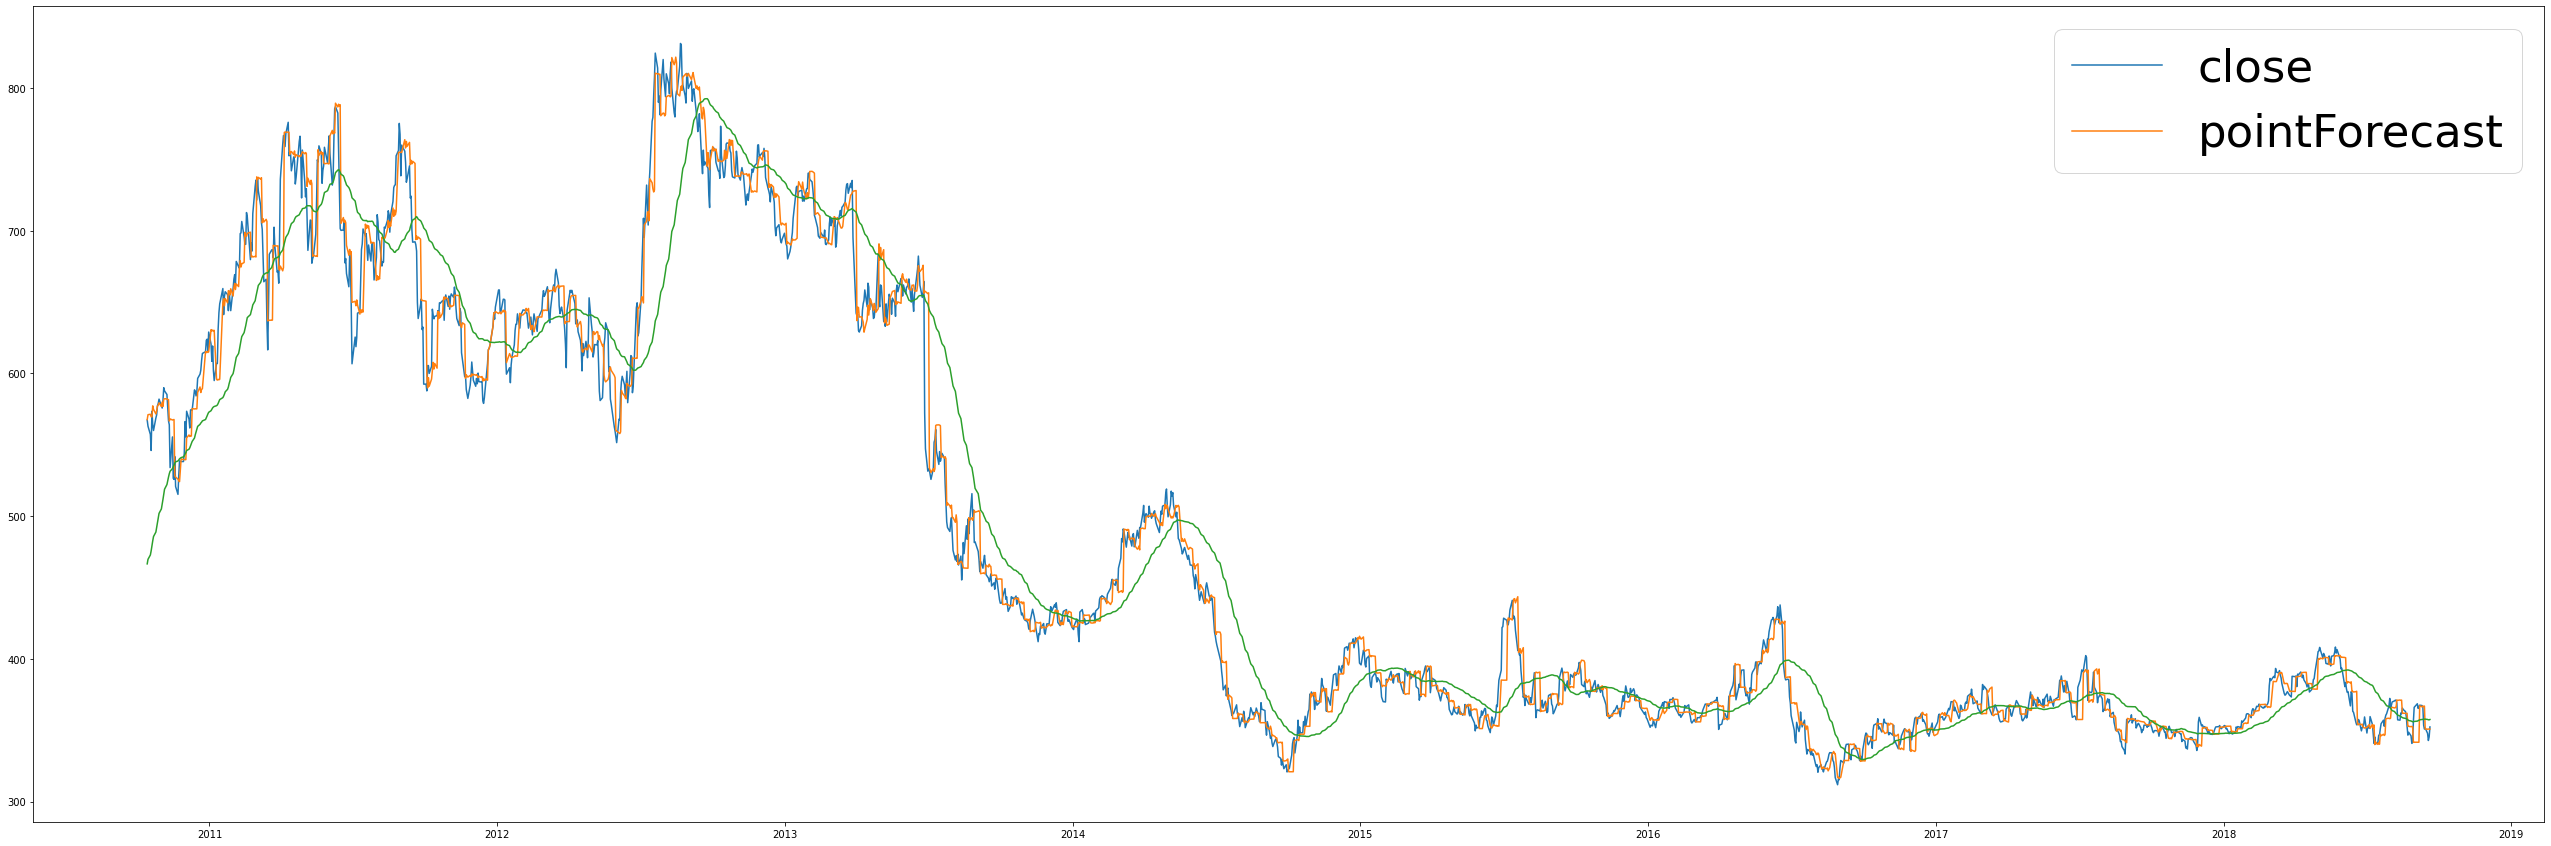

In [17]:
plt.figure(figsize=(45,15))

plt.plot(forecast_df['close'][10000:12000])
plt.plot(forecast_df['pointForecast'][10000:12000])
plt.plot(forecast_df['MA_50'][10000:12000])

plt.legend(['close','pointForecast'],fontsize=45)

plt.savefig(r'pnl.jpg')

plt.show()

# Trade Analytics

In [35]:
# print("No. Trades:   ",len(positions['pnl']))
# print("relative Pnl: ", relativepnl(positions['pnl']))
# print("Hit Rate:     ", hitrate(positions['pnl']))
# print("Minimum:      ",np.min(positions['pnl']))
# print("Maximum:      ",np.max(positions['pnl']))
# print("Mean:         ",np.mean(positions['pnl']))
# print("Variance:     ",np.var(positions['pnl']))
# print("Std. Dev:     ",np.sqrt(np.var(positions['pnl'])))
# print("Skew:         ",skew(positions['pnl']))
# print("Kurtosis:     ",kurtosis(positions['pnl']))

# Metadata

In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [43]:
metadata = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_strategies\corn_arma_ma\output\arma(2,2)\metadata_corn_(2, 2)_True_5.csv')

In [44]:
metadata.head()

,Unnamed: 0,asofdate,aic,bic,hqic,mae,mse,rsquare,forecastHorizon,diff,trainDFLength,num_models,order_p,order_q,time,product_name,ar.L1.close,ar.L2.close,ma.L1.close,ma.L2.close
0,0,1970-01-05 01:00:00+00:00,-1584.185683,-1563.009109,-1575.664669,0.006769,0.000104,0.941049,5,True,252,13000,2,2,0 days 00:00:00.525571,corn,0.260699,0.199275,0.229561,0.184291
1,1,1970-01-12 01:00:00+00:00,-1583.359337,-1562.182763,-1574.838323,0.006798,0.000104,0.942485,5,True,252,13000,2,2,0 days 00:00:00.892340,corn,0.274409,0.200899,0.244312,0.185611
2,2,1970-01-19 01:00:00+00:00,-1582.329826,-1561.153251,-1573.808811,0.006841,0.000105,0.944476,5,True,252,13000,2,2,0 days 00:00:00.545480,corn,0.282972,0.211083,0.254490,0.193996
3,3,1970-01-26 01:00:00+00:00,-1581.145216,-1559.968641,-1572.624201,0.006854,0.000105,0.943845,5,True,252,13000,2,2,0 days 00:00:00.626629,corn,0.304330,0.215280,0.279072,0.189677
4,4,1970-02-02 01:00:00+00:00,-1580.584777,-1559.408203,-1572.063762,0.006895,0.000105,0.942642,5,True,252,13000,2,2,0 days 00:00:00.577587,corn,0.290073,0.213977,0.264534,0.191214


In [45]:
# metadata.mean(axis=0).to_csv(f"""{metadata['product_name'][0]}_arma_({metadata['order_p'][0]},{metadata['order_q'][0]}).csv""")


In [46]:
metadata.var(axis=0)

Unnamed: 0         5.536255e+05
aic                2.007795e+04
bic                2.007795e+04
hqic               2.007795e+04
mae                1.142901e-05
mse                2.167329e-08
rsquare            9.199396e-04
forecastHorizon    0.000000e+00
diff               0.000000e+00
trainDFLength      0.000000e+00
num_models         0.000000e+00
order_p            0.000000e+00
order_q            0.000000e+00
ar.L1.close        2.186524e-01
ar.L2.close        1.264921e-01
ma.L1.close        2.225506e-01
ma.L2.close        1.429024e-01
dtype: float64

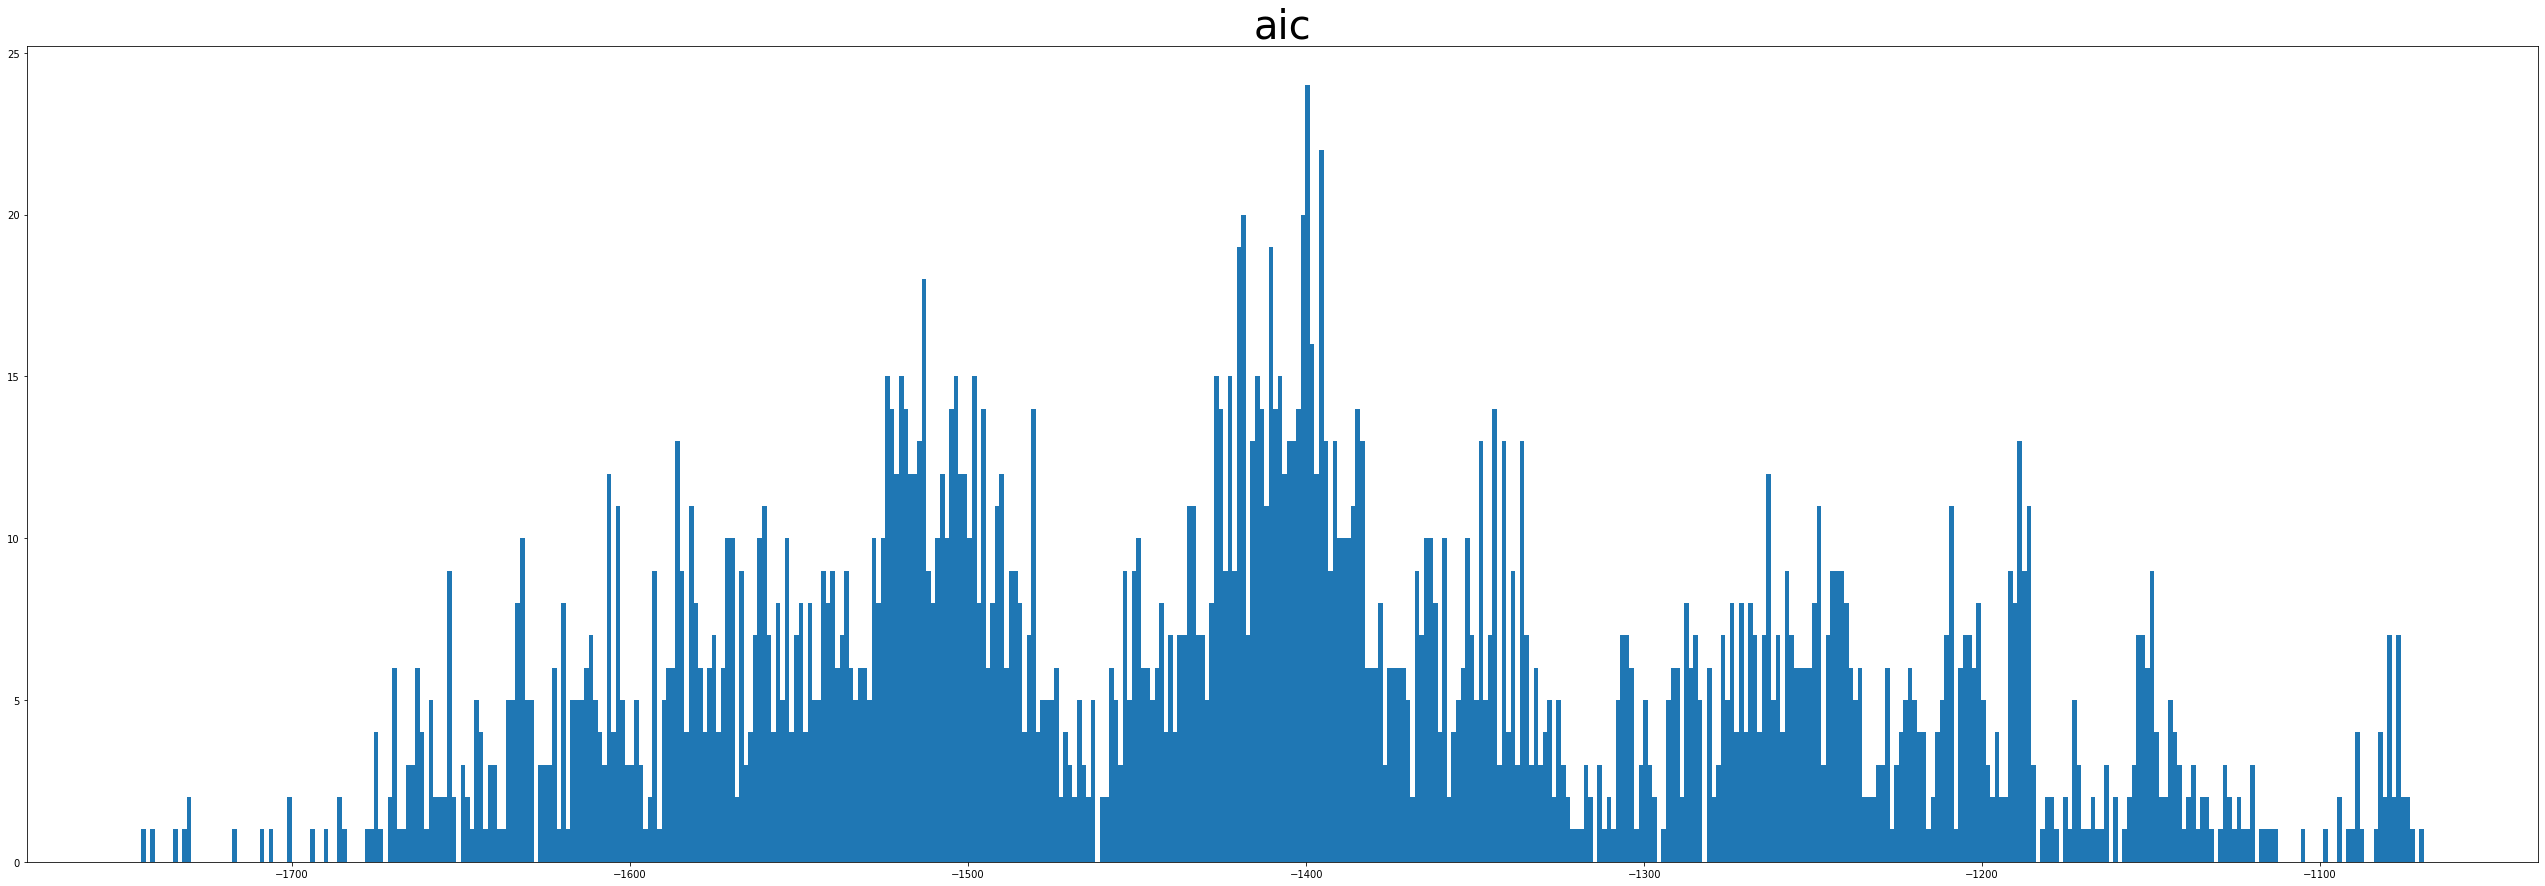

In [47]:
plt.figure(figsize=(45,15))

plt.title('aic',fontsize=40)

plt.hist(metadata['aic'],bins=500)

plt.show()

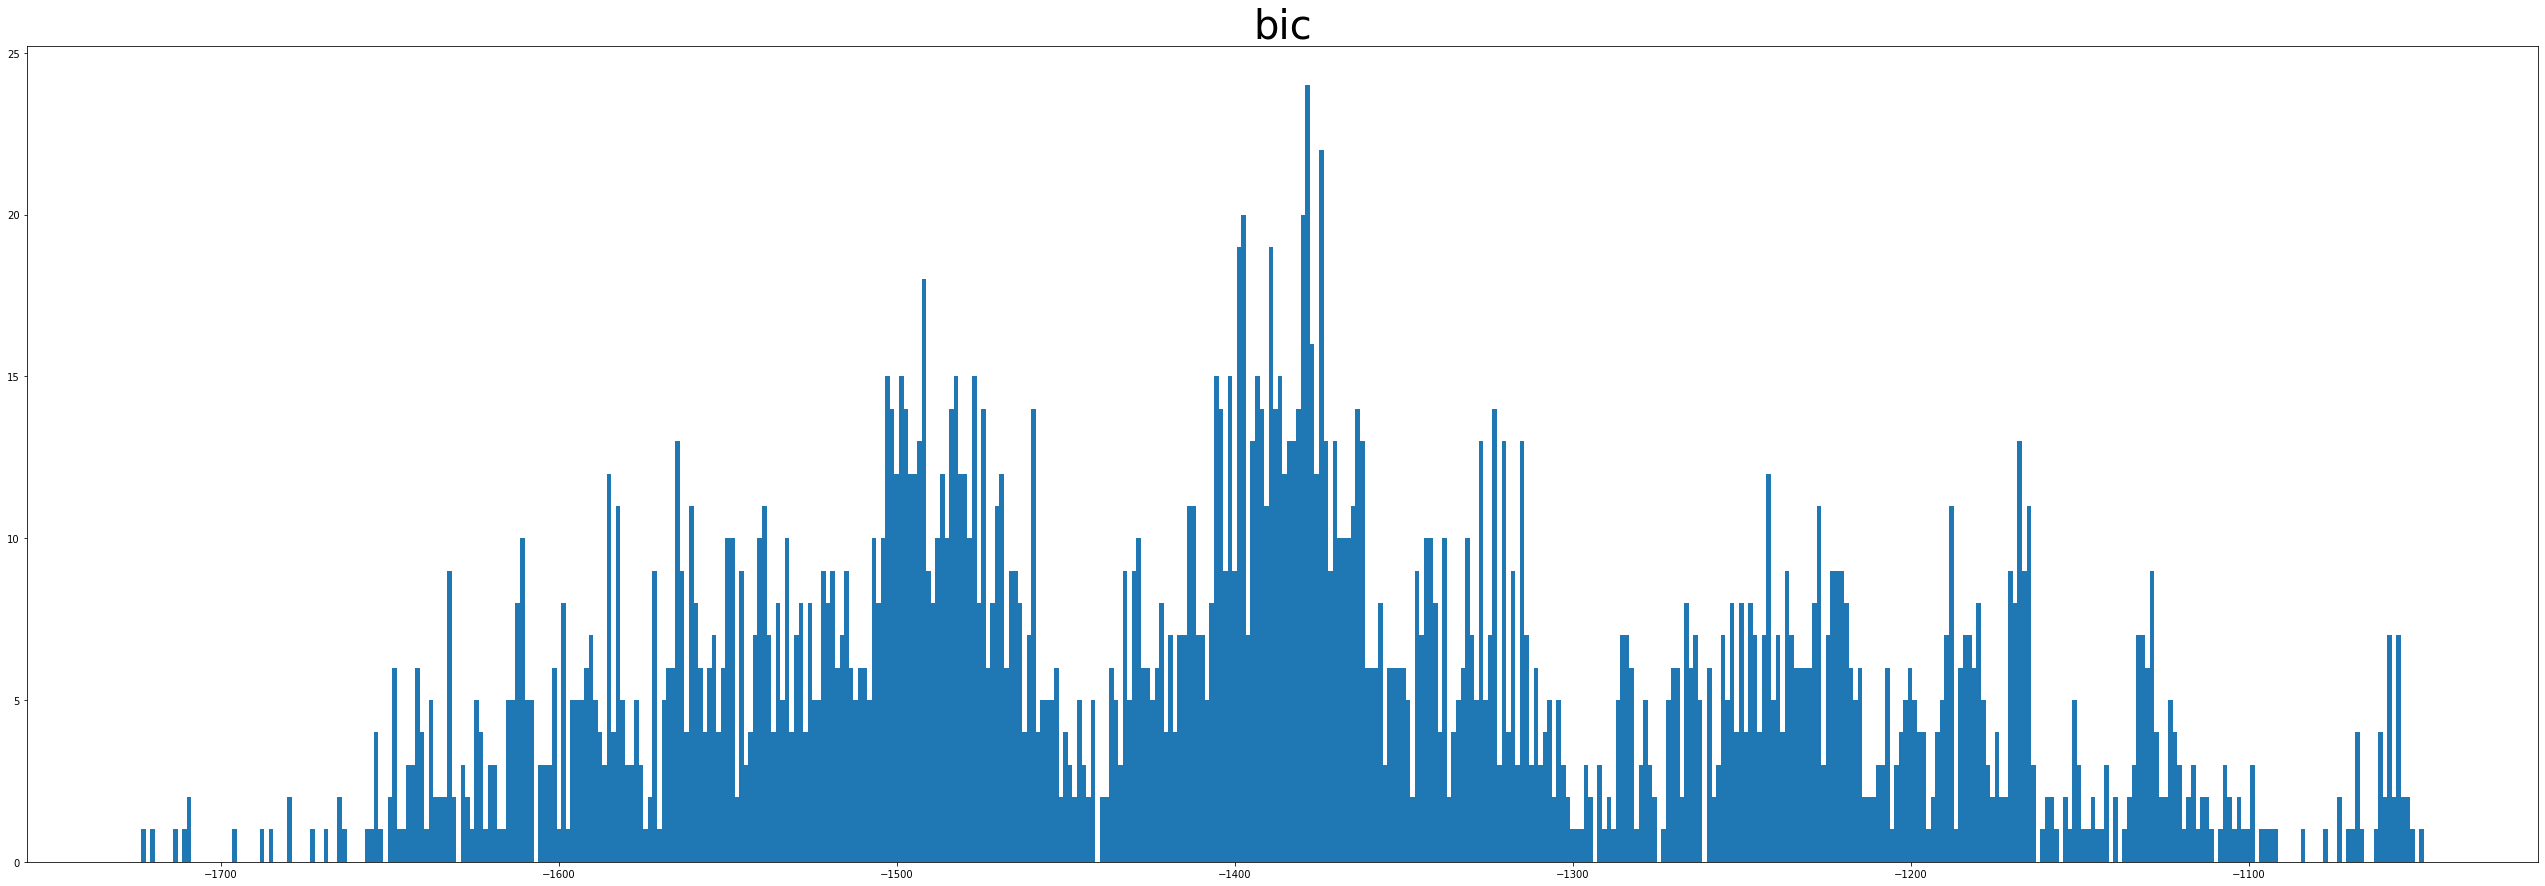

In [48]:
plt.figure(figsize=(45,15))

plt.title('bic',fontsize=40)

plt.hist(metadata['bic'],bins=500)

plt.show()

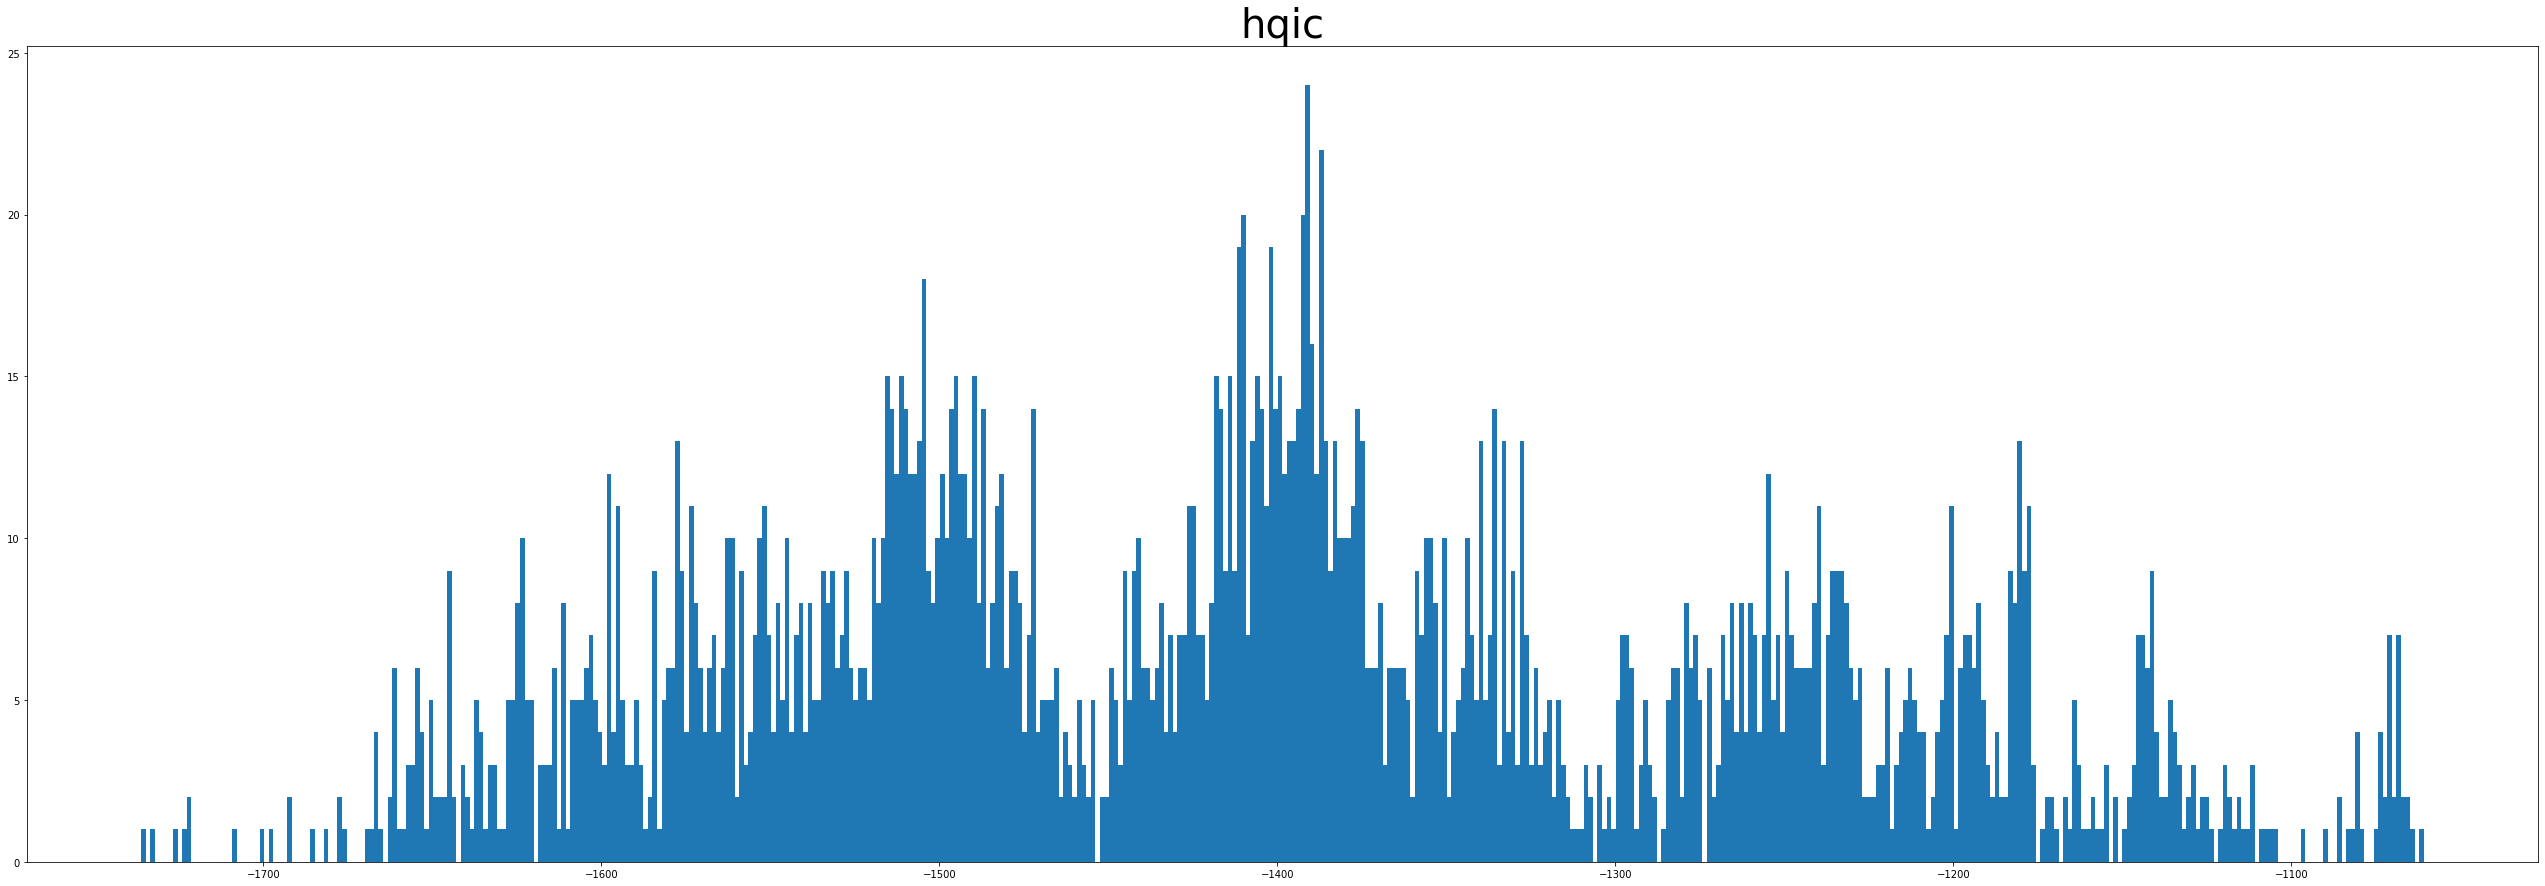

In [49]:
plt.figure(figsize=(45,15))

plt.title('hqic',fontsize=40)

plt.hist(metadata['hqic'],bins=500)

plt.show()

In [50]:
metadata.columns

Index(['Unnamed: 0', 'asofdate', 'aic', 'bic', 'hqic', 'mae', 'mse', 'rsquare',
       'forecastHorizon', 'diff', 'trainDFLength', 'num_models', 'order_p',
       'order_q', 'time', 'product_name', 'ar.L1.close', 'ar.L2.close',
       'ma.L1.close', 'ma.L2.close'],
      dtype='object')

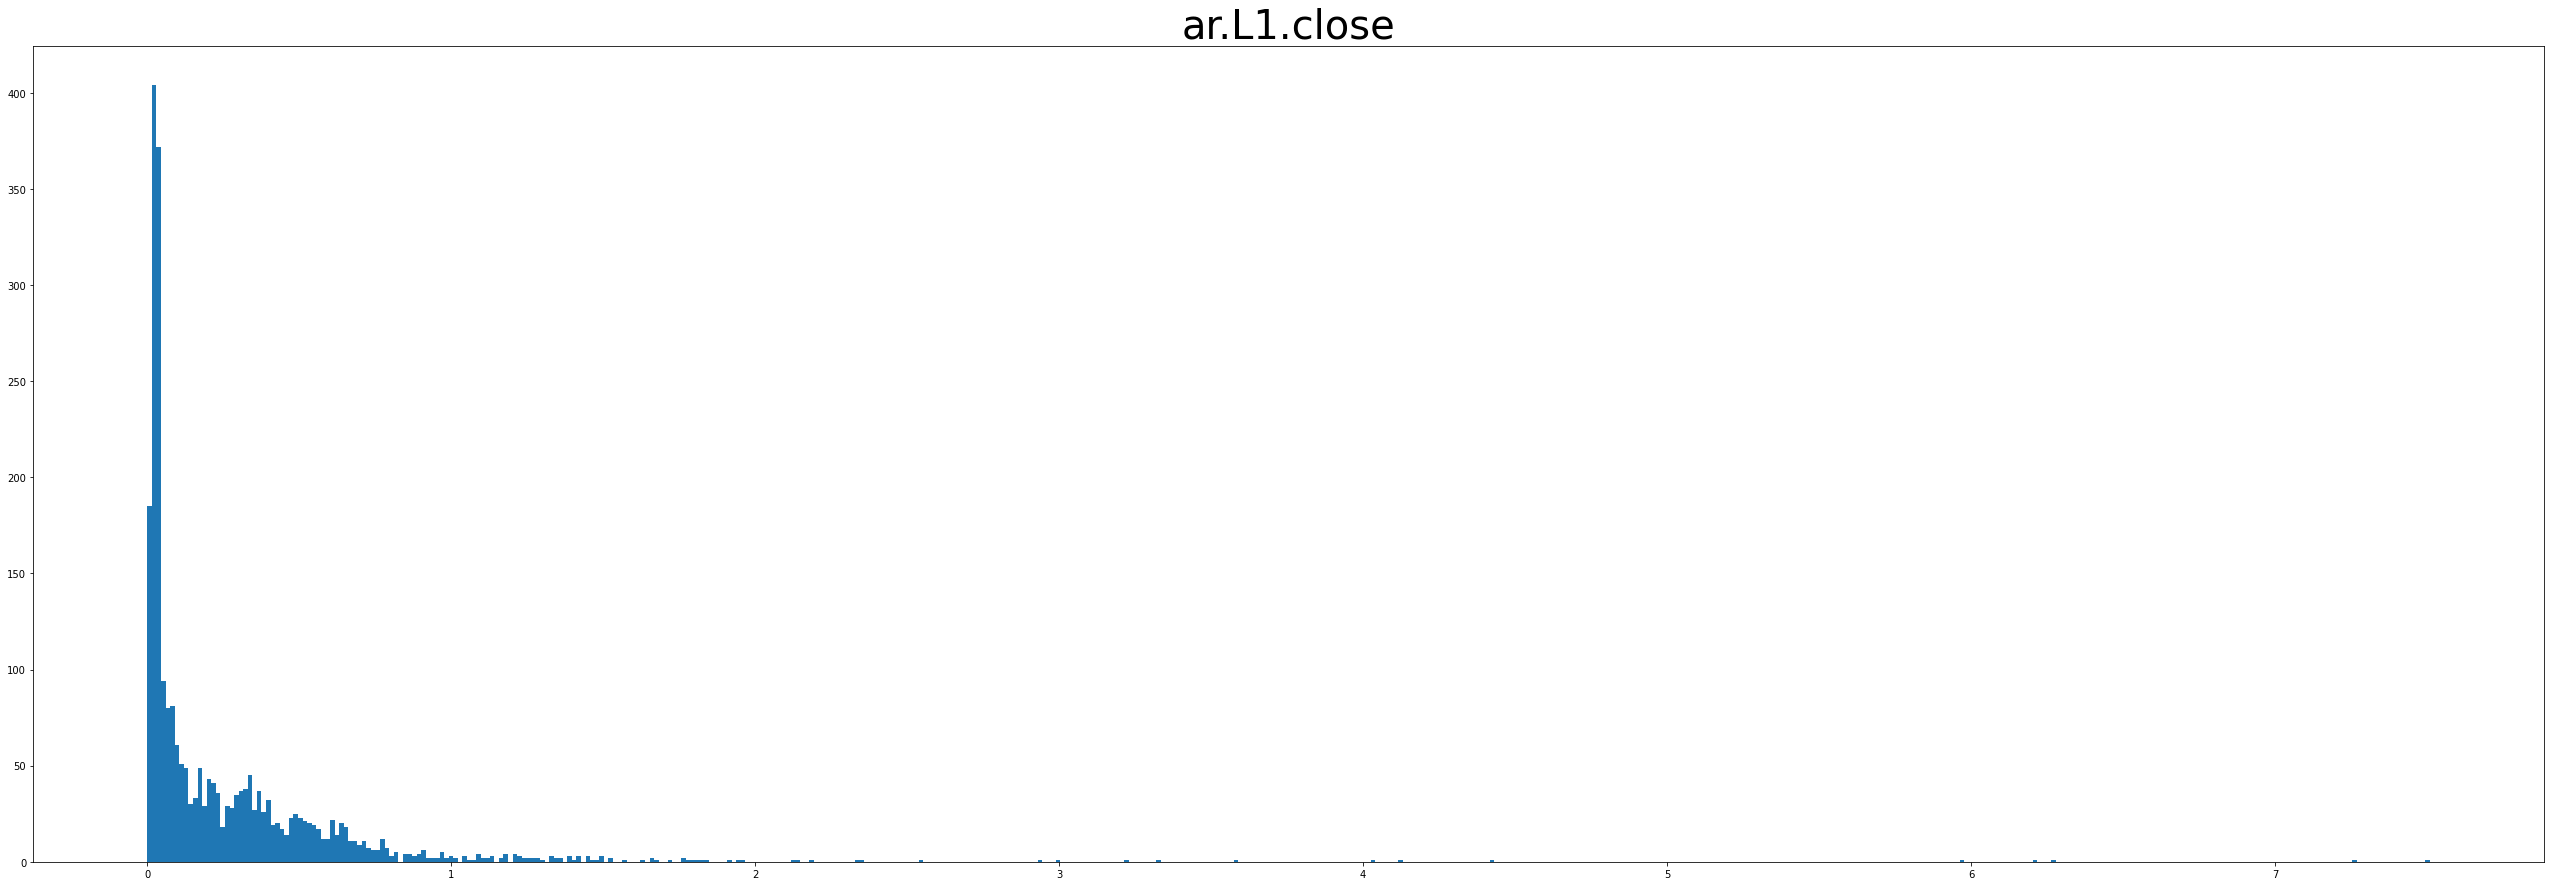

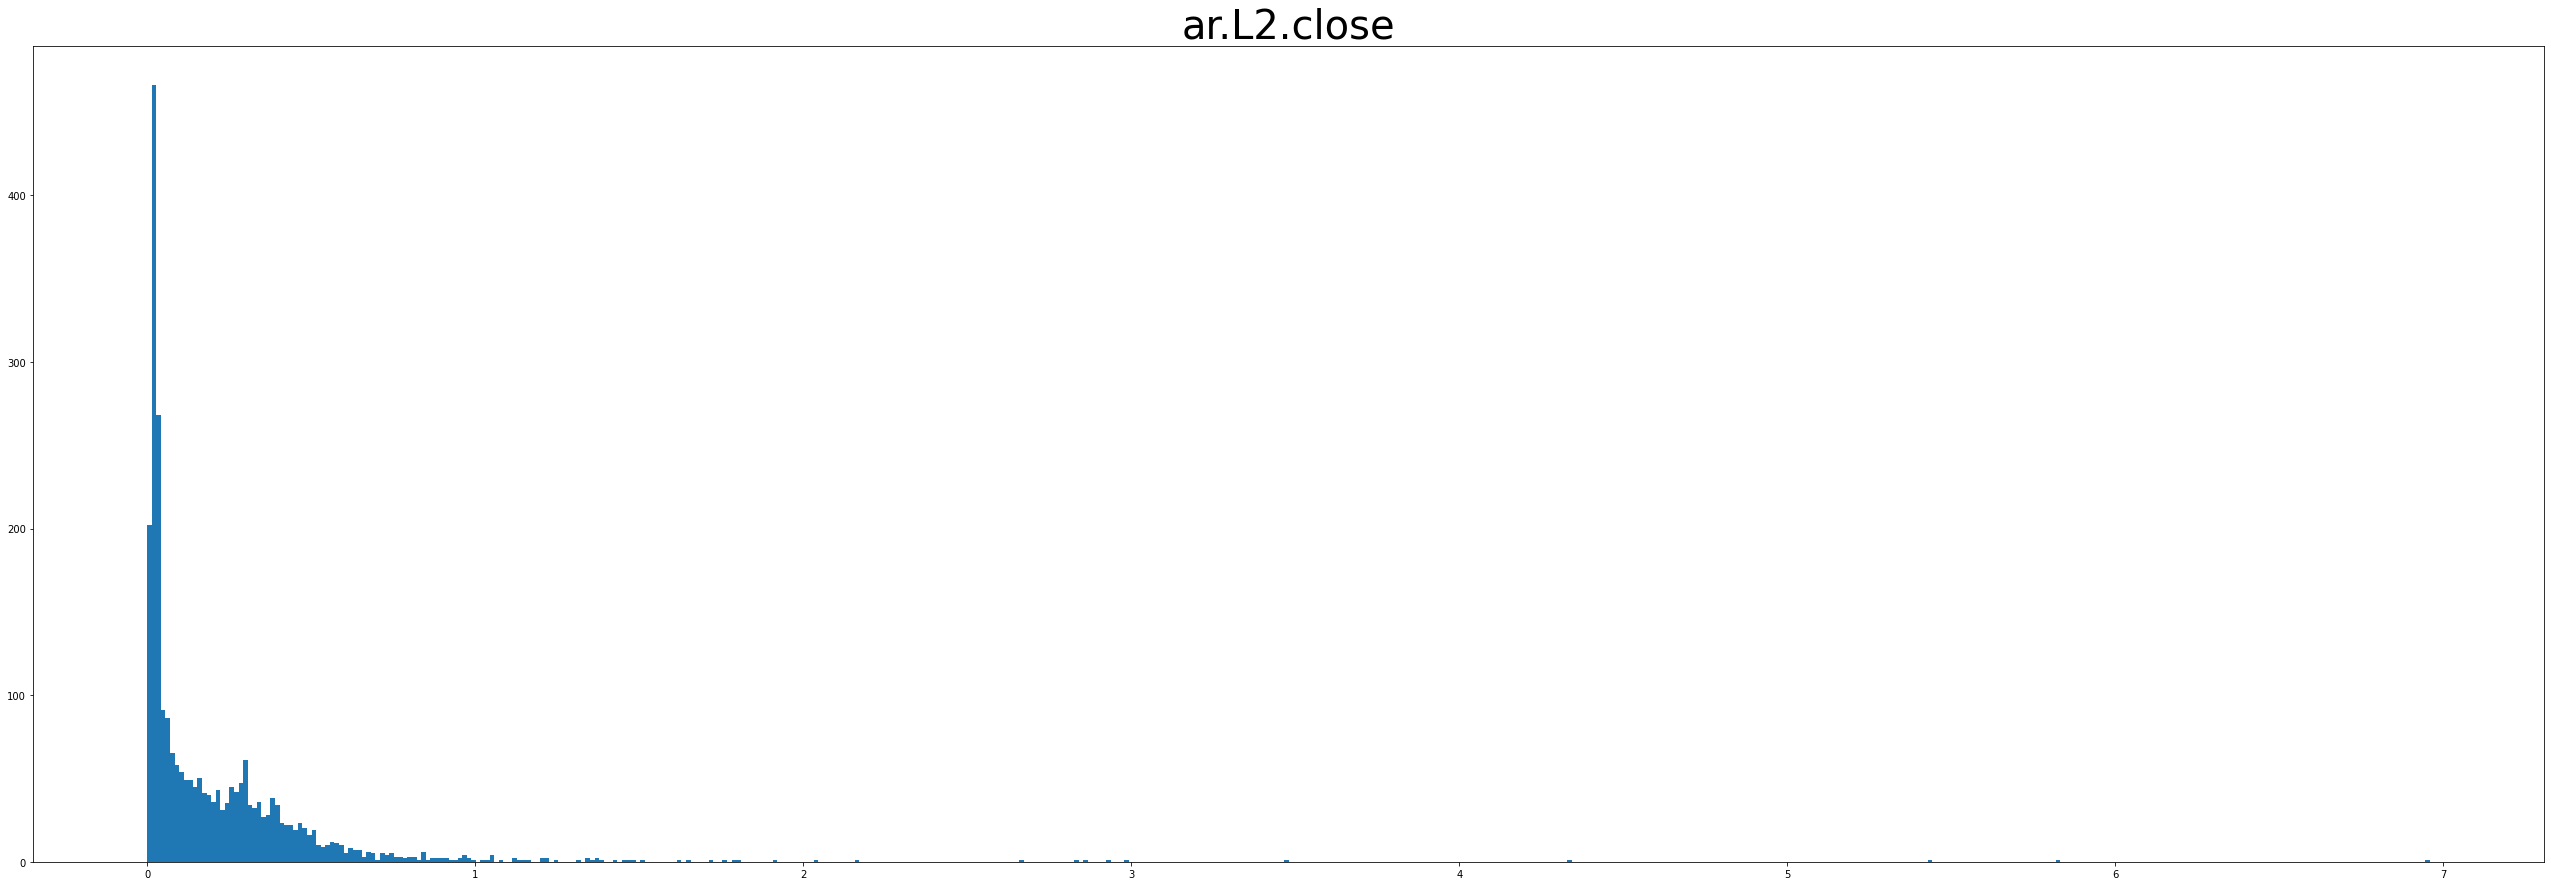

In [51]:
for i in range(1,metadata['order_p'][0]+1):

    plt.figure(figsize=(45,15))

    plt.title(f'ar.L{i}.close',fontsize=40)
    plt.hist(metadata[f'ar.L{i}.close'],bins=500)

    plt.show()

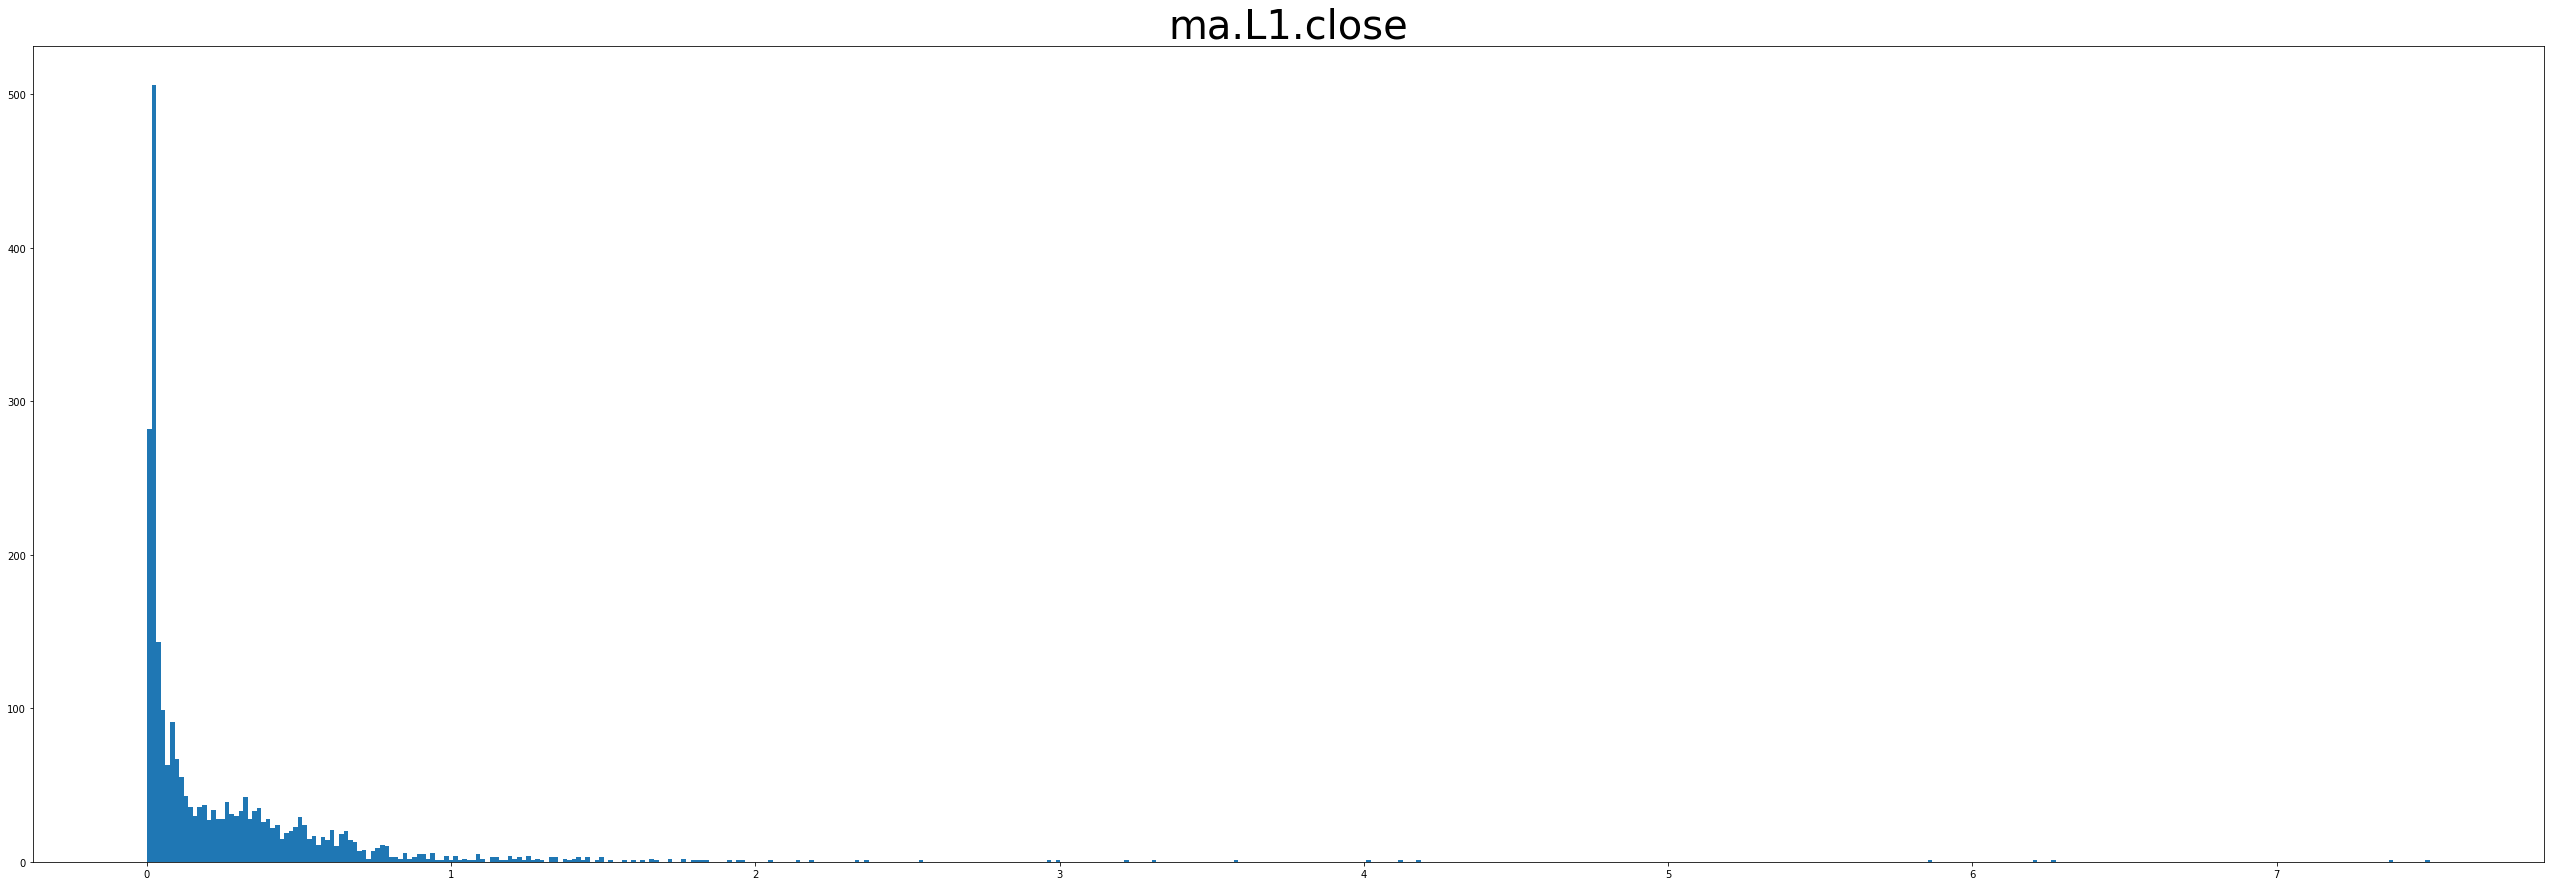

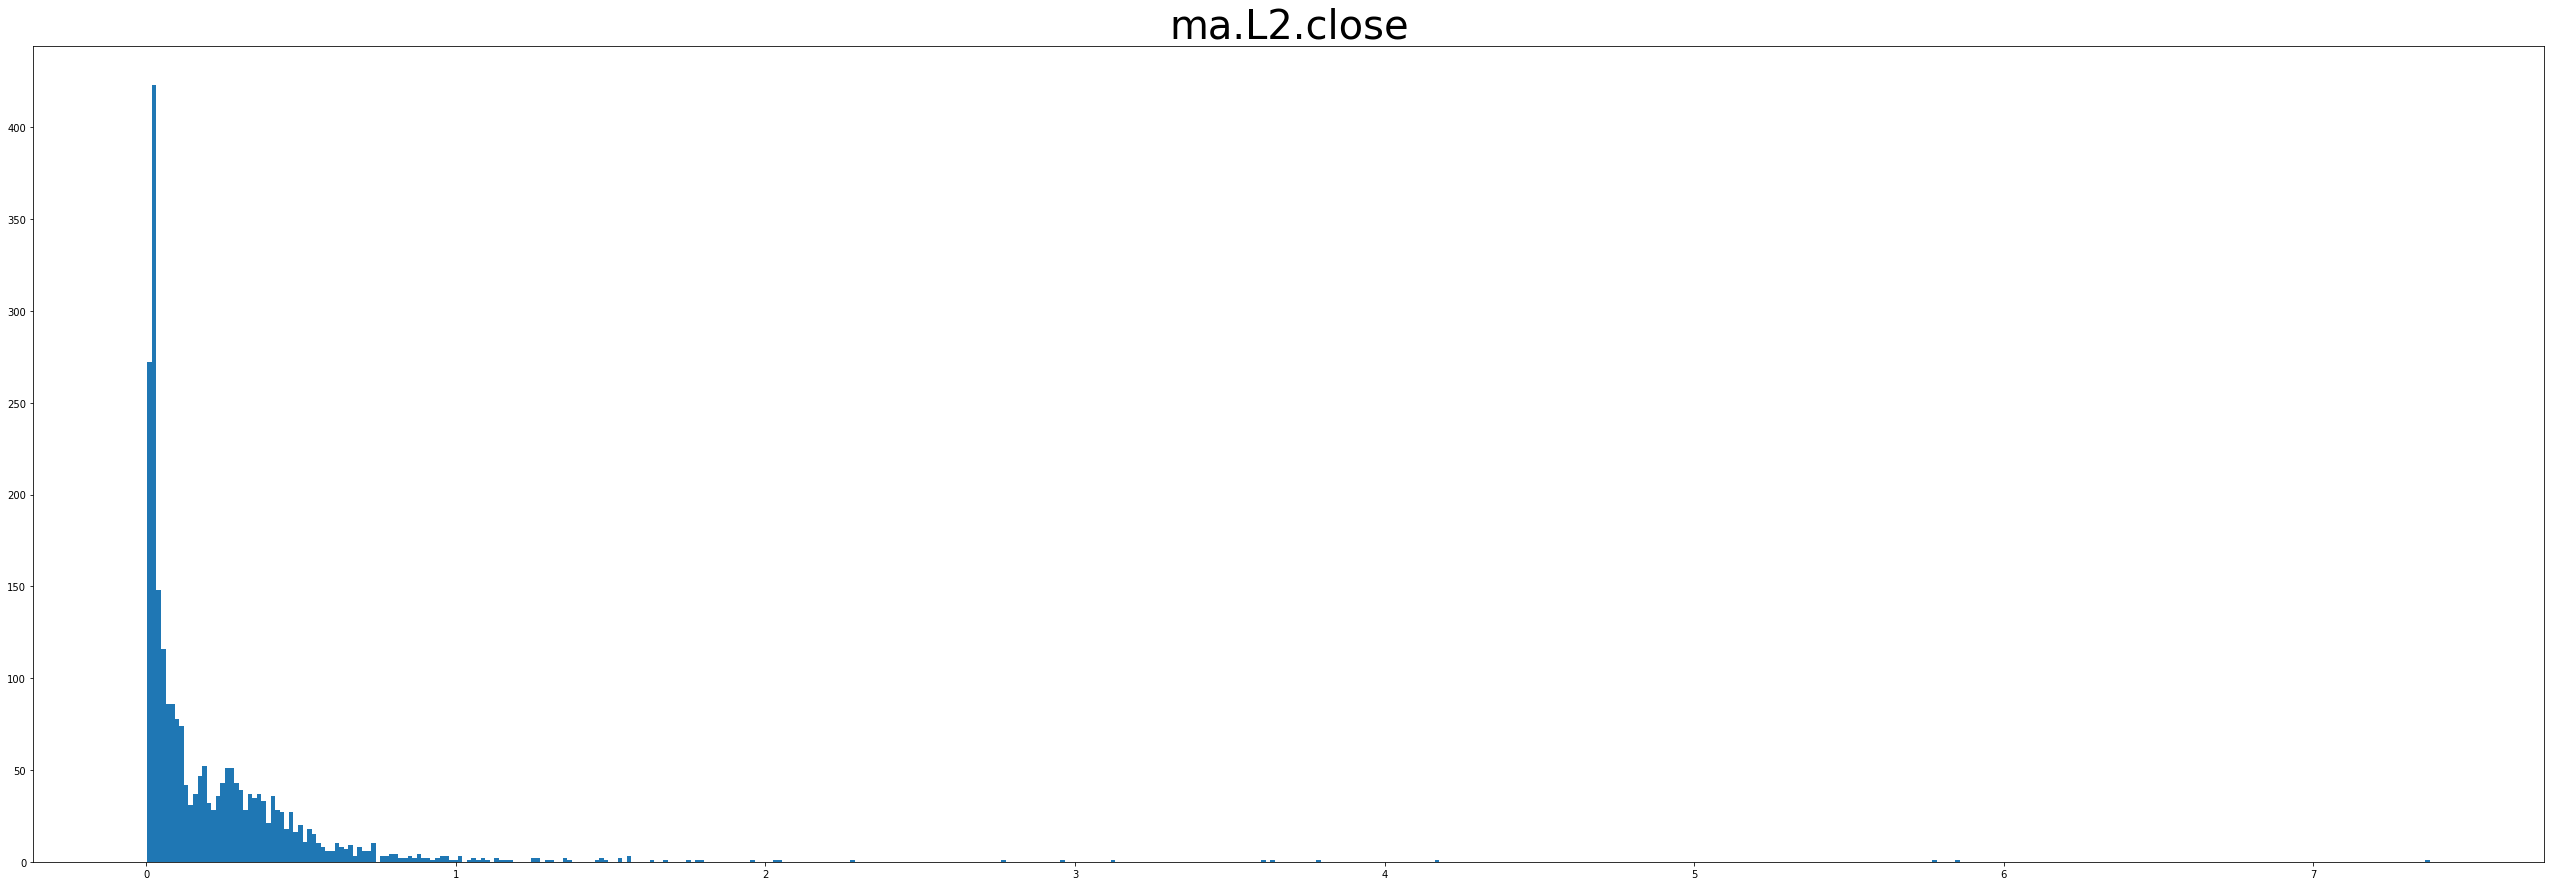

In [52]:
for i in range(1,metadata['order_q'][0]+1):

    plt.figure(figsize=(45,15))

    plt.title(f'ma.L{i}.close',fontsize=40)
    plt.hist(metadata[f'ma.L{i}.close'],bins=500)

    plt.show()

# Forecast Analysis

In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [54]:
def breakdown_forecast_error(forecast_dataframe):
    
    cacheForecastDayError = {

        'forecastday':[],
        'forecasterror':[],
    }

    for l in forecast_dataframe['forecastday'].unique():
        cacheForecastDayError['forecastday'].append(l)
        cacheForecastDayError['forecasterror'].append((forecast_dataframe[forecast_dataframe['forecastday'] == l]['pointForecast']\
                                                     - forecast_dataframe[forecast_dataframe['forecastday'] == l]['close']).mean())

    return pd.DataFrame(cacheForecastDayError).set_index('forecastday')

In [55]:
forecast_dataframe = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_strategies\corn_arma_ma\output\arma_(1,0)\forecasts_corn_(1, 0)_True_5.csv')

In [56]:
forecast_error = breakdown_forecast_error(forecast_dataframe)
forecast_error.head()

,forecasterror
forecastday,
1,0.153158
2,0.096123
3,-0.053591
4,-0.098091
5,-0.114828


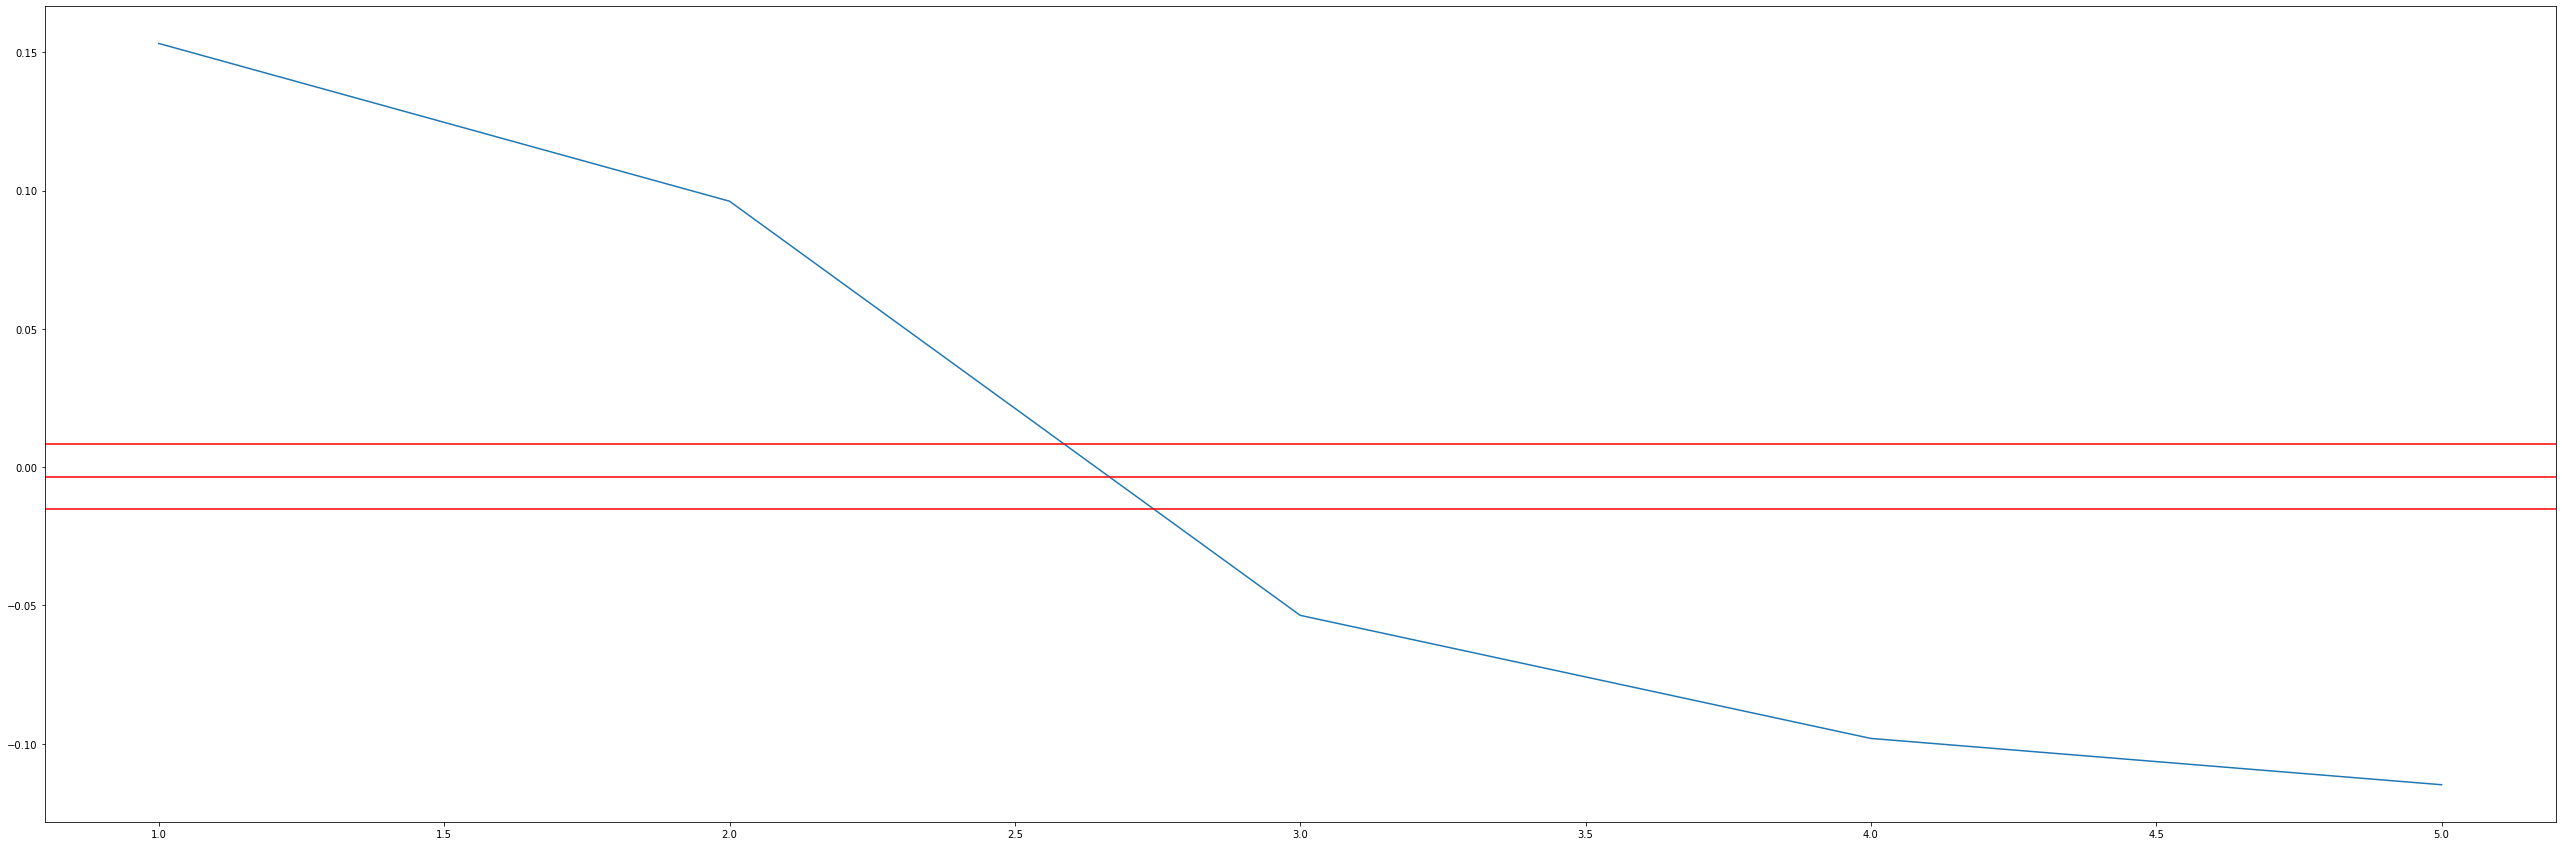

In [57]:
plt.figure(figsize=(45,15))

plt.plot(forecast_error['forecasterror'])

plt.axhline(np.mean(forecast_error['forecasterror']),color = 'red')
plt.axhline(np.mean(forecast_error['forecasterror'])+np.var(forecast_error['forecasterror']),color = 'red')
plt.axhline(np.mean(forecast_error['forecasterror'])-np.var(forecast_error['forecasterror']),color = 'red')

plt.show()